<a href="https://colab.research.google.com/github/ffviana/NUTRECON/blob/main/FractalPairing_Pilot/Data%20Analysis/Colab%20Notebooks/Distinguishability_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

og_palette = sns.color_palette()

In [ ]:
DBfolder_path = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/2. Databases/'

# Flavour Ratings

In [ ]:
flavorRating_path = DBfolder_path + 'FlavorRatings.xlsx'

flavorRating_df = pd.read_excel(flavorRating_path,header = [0, 1], index_col = 0)
flavorRating_df.dropna(how = 'all', inplace = True)
flavorRating_df

Apple Cider             Black Currant             Cashew        \
subject_id           N     I     P             N     I     P      N     I   
ercffa_001        19.0   6.0  16.0          57.0  17.0   6.0   40.0   9.0   
ercffa_002         2.0  12.0  18.0          16.0   5.0  39.0   28.0  35.0   
ercffa_003         0.0   6.0  31.0          81.0  23.0 -20.0   96.0  44.0   
ercffa_004        11.0  11.0  11.0          51.0  24.0   6.0   34.0  21.0   
ercffa_005        81.0  21.0  -3.0          19.0  44.0   8.0   92.0  58.0   
ercffa_006        34.0  17.0 -14.0           0.0   2.0   0.0   18.0  12.0   
ercffa_007         0.0  10.0  24.0          74.0  35.0  29.0   75.0  35.0   
ercffa_008        78.0  17.0  54.0          79.0  27.0  44.0   59.0  35.0   
ercffa_009        52.0  21.0  27.0          33.0  13.0  35.0   38.0  50.0   
ercffa_010        21.0   4.0   8.0          16.0  10.0  -9.0   16.0   3.0   
ercffa_012         0.0   2.0   0.0           8.0   6.0   4.0    3.0   9.0   
ercffa_013        66.0  24.0  26.0          16.0  14.0   9.0   70.0  22.0   
ercffa_014         6.0  15.0  10.0          53.0   8.0   7.0    8.0  20.0   
ercffa_015         0.0   1.0  18.0          72.0  31.0  -9.0   49.0  21.0   
ercffa_016         0.0   0.0   0.0          28.0   5.0   1.0    1.0   5.0   
ercffa_017        45.0  30.0  -3.0          13.0  28.0  -4.0   45.0  15.0   
ercffa_018        31.0  15.0   5.0         100.0  38.0 -38.0   92.0  29.0   
ercffa_019         2.0  19.0  64.0          42.0   5.0   3.0   17.0  29.0   
ercffa_020        36.0  29.0  28.0          66.0  30.0  24.0   62.0  42.0   
ercffa_021        65.0  45.0 -13.0          27.0  22.0 -12.0   96.0  81.0   
ercffa_022        26.0  21.0  35.0           4.0  32.0  -1.0   49.0  32.0   

                 Lychee             Pomegranate             Tamarind        \
subject_id     P      N     I     P           N     I     P        N     I   
ercffa_001  24.0    6.0   6.0  14.0         2.0  15.0  18.0     36.0   9.0   
ercffa_002  -7.0    1.0  11.0  41.0         6.0  17.0  36.0     12.0  15.0   
ercffa_003 -63.0   31.0  26.0 -12.0        49.0   9.0 -18.0     38.0  17.0   
ercffa_004  28.0    0.0  12.0  12.0        49.0  27.0  17.0      6.0  11.0   
ercffa_005 -28.0    7.0  22.0  25.0         5.0  21.0   3.0     34.0  14.0   
ercffa_006 -11.0    8.0   2.0  -3.0         2.0   7.0  -3.0      7.0   3.0   
ercffa_007  -3.0    4.0  11.0  13.0        47.0  28.0   6.0     23.0  26.0   
ercffa_008  44.0   19.0  17.0  44.0        85.0  30.0  31.0     26.0  26.0   
ercffa_009   8.0   16.0  16.0  41.0        42.0  10.0  16.0     64.0  51.0   
ercffa_010   3.0    6.0   4.0   3.0        24.0   3.0  14.0      8.0   4.0   
ercffa_012  10.0    7.0   7.0   6.0        28.0  13.0   6.0      0.0  13.0   
ercffa_013   3.0    9.0  12.0   9.0         5.0   9.0  20.0     39.0  17.0   
ercffa_014   4.0   40.0   5.0   3.0         2.0  19.0  15.0      6.0   8.0   
ercffa_015  -9.0   11.0  14.0  -1.0         6.0   9.0   4.0      1.0   6.0   
ercffa_016   0.0    1.0   2.0   0.0         2.0   2.0   0.0      0.0   2.0   
ercffa_017   7.0   37.0  26.0   5.0        28.0  21.0  21.0     16.0  26.0   
ercffa_018  -9.0   13.0  14.0  -4.0        98.0  38.0 -32.0     14.0   8.0   
ercffa_019 -32.0   14.0   5.0   0.0        19.0   5.0   9.0     59.0   5.0   
ercffa_020 -13.0    4.0  40.0  47.0        42.0  38.0  47.0     39.0   8.0   
ercffa_021 -57.0    4.0  13.0  40.0        71.0  59.0 -27.0     79.0  43.0   
ercffa_022  -4.0   27.0  22.0  22.0         7.0  22.0  23.0     60.0  30.0   

                  
subject_id     P  
ercffa_001  24.0  
ercffa_002   2.0  
ercffa_003   0.0  
ercffa_004  12.0  
ercffa_005   9.0  
ercffa_006   0.0  
ercffa_007  39.0  
ercffa_008  44.0  
ercffa_009  -4.0  
ercffa_010   9.0  
ercffa_012  18.0  
ercffa_013   1.0  
ercffa_014   2.0  
ercffa_015   6.0  
ercffa_016   0.0  
ercffa_017  30.0  
ercffa_018 -21.0  
ercffa_019  -9.0  
ercffa_020  12.0  
ercffa_021 -25.0  
ercffa_022   3.0

In [ ]:
flavorRating_dfLong = pd.melt(flavorRating_df.reset_index(), id_vars='index' )
flavorRating_dfLong.columns = ['subject_id', 'flavor', 'scale', 'score']

flavorRating_dfLong['scale'] = flavorRating_dfLong['scale'].replace({'N':'Novelty', 'P':'Pleasantness', 'I':'Intensity'})
flavorRating_dfLong

,subject_id,flavor,scale,score
0,ercffa_001,Apple Cider,Novelty,19.0
1,ercffa_002,Apple Cider,Novelty,2.0
2,ercffa_003,Apple Cider,Novelty,0.0
3,ercffa_004,Apple Cider,Novelty,11.0
4,ercffa_005,Apple Cider,Novelty,81.0
...,...,...,...,...
373,ercffa_018,Tamarind,Pleasantness,-21.0
374,ercffa_019,Tamarind,Pleasantness,-9.0
375,ercffa_020,Tamarind,Pleasantness,12.0
376,ercffa_021,Tamarind,Pleasantness,-25.0


In [ ]:
flavorRating_dfLong_2 = flavorRating_dfLong.pivot(index = ['subject_id', 'flavor'], columns='scale', values = ['score'])
flavorRating_df2 = flavorRating_dfLong_2.reset_index()
flavorRating_df2 = flavorRating_df2.droplevel(0,axis=1)
flavorRating_df2.columns = ['subject_id', 'flavor','Intensity', 'Novelty', 'Pleasantness']
flavorRating_df2.columns.name = ''
flavorRating_df2.tail(6)

,subject_id,flavor,Intensity,Novelty,Pleasantness
120,ercffa_022,Apple Cider,21.0,26.0,35.0
121,ercffa_022,Black Currant,32.0,4.0,-1.0
122,ercffa_022,Cashew,32.0,49.0,-4.0
123,ercffa_022,Lychee,22.0,27.0,22.0
124,ercffa_022,Pomegranate,22.0,7.0,23.0
125,ercffa_022,Tamarind,30.0,60.0,3.0


In [ ]:
base_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/'

subjectFigures_folder = base_folder + '3. Analyses/Subject_by_Subject_plots'
registery_fname = base_folder + '2. Databases/subjectFiles_registration.json'
sequenceFolder = base_folder + '1. DataAcquisition/ExperimentsRoom/SitmulusPresentationSequence'
AssTestFolder = base_folder + '1. DataAcquisition/ExperimentsRoom/AssociationTask_ExperimentsRoom'


with open(registery_fname) as json_file:
    registery = json.load(json_file)

subjectFile_Identification = pd.DataFrame.from_records(registery).T
sequenceFiles = subjectFile_Identification['sequence'].tolist()

for fname in sequenceFiles:
  subject_id = fname[:10]
  ffpairs_df_ = np.load('{}/{}'.format(sequenceFolder, fname), 
                        allow_pickle=True).item()['Flavor-Fractal pairs']
  ffpairs_df_ = ffpairs_df_[ffpairs_df_['Flavor']!= 'Plain' ].drop(columns=['Flavor_code'])
  ffpairs_df_['subject_id'] = subject_id

  if fname == sequenceFiles[0]:
    ffpairs_df = ffpairs_df_
  else:
    ffpairs_df = pd.concat([ffpairs_df,ffpairs_df_], axis = 0)

ffpairs_df.reset_index(inplace = True)
selected_FlavorRatings_df = flavorRating_df2.merge(ffpairs_df, left_on=['subject_id', 'flavor'], right_on = ['subject_id', 'Flavor']).drop(columns=['flavor'])
selected_FlavorRatings_df = selected_FlavorRatings_df[['subject_id', 'Fractal', 'Flavor','Intensity', 'Novelty', 'Pleasantness']]
selected_FlavorRatings_df.head(10)

,subject_id,Fractal,Flavor,Intensity,Novelty,Pleasantness
0,ercffa_001,IV,Cashew,9.0,40.0,24.0
1,ercffa_001,II,Tamarind,9.0,36.0,24.0
2,ercffa_002,IV,Black Currant,5.0,16.0,39.0
3,ercffa_002,I,Pomegranate,17.0,6.0,36.0
4,ercffa_004,V,Black Currant,24.0,51.0,6.0
5,ercffa_004,II,Cashew,21.0,34.0,28.0
6,ercffa_004,IV,Pomegranate,27.0,49.0,17.0
7,ercffa_005,II,Black Currant,44.0,19.0,8.0
8,ercffa_005,VI,Lychee,22.0,7.0,25.0
9,ercffa_005,V,Tamarind,14.0,34.0,9.0


In [ ]:
for fname in sequenceFiles:
  subject_id = fname[:10]
  sequence_dic = np.load('{}/{}'.format(sequenceFolder, fname), 
                        allow_pickle=True).item()
  assoc1_correct_ = sequence_dic['Association Test 1']
  assoc1_correct_['subject_id'] = subject_id
  assoc2_correct_ = sequence_dic['Association Test 2']
  assoc2_correct_['subject_id'] = subject_id
  assoc3_correct_ = sequence_dic['Association Test 3']
  assoc3_correct_['subject_id'] = subject_id
  cols = ['subject_id', 'fractal']

  if fname == sequenceFiles[0]:
    assoc1_correct = assoc1_correct_[cols]
    assoc2_correct = assoc2_correct_[cols]
    assoc3_correct = assoc3_correct_[cols]
  else:
    assoc1_correct = pd.concat([assoc1_correct,assoc1_correct_[cols]], axis = 0)
    assoc2_correct = pd.concat([assoc2_correct,assoc2_correct_[cols]], axis = 0)
    assoc3_correct = pd.concat([assoc3_correct,assoc3_correct_[cols]], axis = 0)

sequence_dic.keys()

assoc1_correct['Association test'] = 'Test 1'
assoc2_correct['Association test'] = 'Test 2'
assoc3_correct['Association test'] = 'Test 3'

assoc_correct = pd.concat([assoc1_correct, assoc2_correct, assoc3_correct], 
                          axis = 0)
assoc_correct.reset_index(inplace = True)

assoc1Files = subjectFile_Identification['association_1'].dropna().tolist()
assoc2Files = subjectFile_Identification['association_2'].dropna().tolist()
assoc3Files = subjectFile_Identification['association_3'].dropna().tolist()

for fname in assoc1Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc1_ans_ = AssTest_df[cols]

  if fname == assoc1Files[0]:
    assoc1_ans = assoc1_ans_
  else:
    assoc1_ans = pd.concat([assoc1_ans, assoc1_ans_], axis = 0)

for fname in assoc2Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc2_ans_ = AssTest_df[cols]

  if fname == assoc2Files[0]:
    assoc2_ans = assoc2_ans_
  else:
    assoc2_ans = pd.concat([assoc2_ans, assoc2_ans_], axis = 0)


for fname in assoc3Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc3_ans_ = AssTest_df[cols]

  if fname == assoc3Files[0]:
    assoc3_ans = assoc3_ans_
  else:
    assoc3_ans = pd.concat([assoc3_ans, assoc3_ans_], axis = 0)

assoc1_ans['Association test'] = 'Test 1'
assoc2_ans['Association test'] = 'Test 2'
assoc3_ans['Association test'] = 'Test 3'

assoc_ans = pd.concat([assoc1_ans, assoc2_ans, assoc3_ans], axis = 0)
assoc_ans['Trial'] = assoc_ans['Trial'] + 1

assocTest = assoc_ans.merge(assoc_correct, left_on=['Trial', 'subject_id', 'Association test'], right_on=['Order','subject_id', 'Association test']).drop(columns=['Trial', 'Order'])
assocTest.columns = ['subject_id', 'Response' ,'Association test', 'Answer']

fractalDecoder = {0: 'Fractal I',
                  1: 'Fractal II',
                  2: 'Fractal III',
                  3: 'Fractal IV',
                  4: 'Fractal V',
                  5: 'Fractal VI'
                  }

acc_df = pd.DataFrame(columns = ['Fractal', 'Nº of correct responses', 'subject_id', 'Association test'])
for subject_id in assocTest['subject_id'].unique():
  df_ = assocTest[assocTest['subject_id'] == subject_id]
  for assTest in df_['Association test'].unique():
    df = df_[df_['Association test'] == assTest]
    response = df['Response'].tolist()
    answers = df['Answer'].tolist()
    matrix = confusion_matrix(answers, response, labels = np.arange(6))
    accuracyPerLabel = matrix.diagonal()
    accuracyPerLabel = accuracyPerLabel[np.unique(answers)]
    labels = [fractalDecoder[p].split(' ')[-1] for p in np.unique(answers)]
    acc_df_ = pd.DataFrame([labels,accuracyPerLabel]).T
    acc_df_['subject_id'] = subject_id
    acc_df_['Association test'] = assTest
    acc_df_.columns = ['Fractal', 'Nº of correct responses', 'subject_id', 'Association test']
    acc_df = pd.concat([acc_df,acc_df_], axis = 0)

acc_df_wide = acc_df.pivot(index = ['subject_id', 'Fractal'], columns='Association test', values = ['Nº of correct responses'])
acc_df_wide = acc_df_wide.reset_index().transpose().reset_index(level = 0, drop = True).transpose()
acc_df_wide.columns = ['subject_id', 'Fractal',  'Test 1', 'Test 2', 'Test 3']
acc_df_wide.columns.name = None
acc_df_wide.head(10)

,subject_id,Fractal,Test 1,Test 2,Test 3
0,ercffa_001,II,0,0,NaN
1,ercffa_001,IV,3,1,NaN
2,ercffa_002,I,4,2,NaN
3,ercffa_002,IV,2,1,NaN
4,ercffa_004,II,6,5,5
5,ercffa_004,IV,6,6,6
6,ercffa_004,V,6,6,6
7,ercffa_005,II,4,4,4
8,ercffa_005,V,4,4,2
9,ercffa_005,VI,5,6,5


In [ ]:
flavorRatingScores_df = selected_FlavorRatings_df.merge(acc_df_wide, left_on=['subject_id', 'Fractal'], right_on = ['subject_id', 'Fractal'])
flavorRatingScores_df.head(10)

,subject_id,Fractal,Flavor,Intensity,Novelty,Pleasantness,Test 1,Test 2,Test 3
0,ercffa_001,IV,Cashew,9.0,40.0,24.0,3,1,NaN
1,ercffa_001,II,Tamarind,9.0,36.0,24.0,0,0,NaN
2,ercffa_002,IV,Black Currant,5.0,16.0,39.0,2,1,NaN
3,ercffa_002,I,Pomegranate,17.0,6.0,36.0,4,2,NaN
4,ercffa_004,V,Black Currant,24.0,51.0,6.0,6,6,6
5,ercffa_004,II,Cashew,21.0,34.0,28.0,6,5,5
6,ercffa_004,IV,Pomegranate,27.0,49.0,17.0,6,6,6
7,ercffa_005,II,Black Currant,44.0,19.0,8.0,4,4,4
8,ercffa_005,VI,Lychee,22.0,7.0,25.0,5,6,5
9,ercffa_005,V,Tamarind,14.0,34.0,9.0,4,4,2


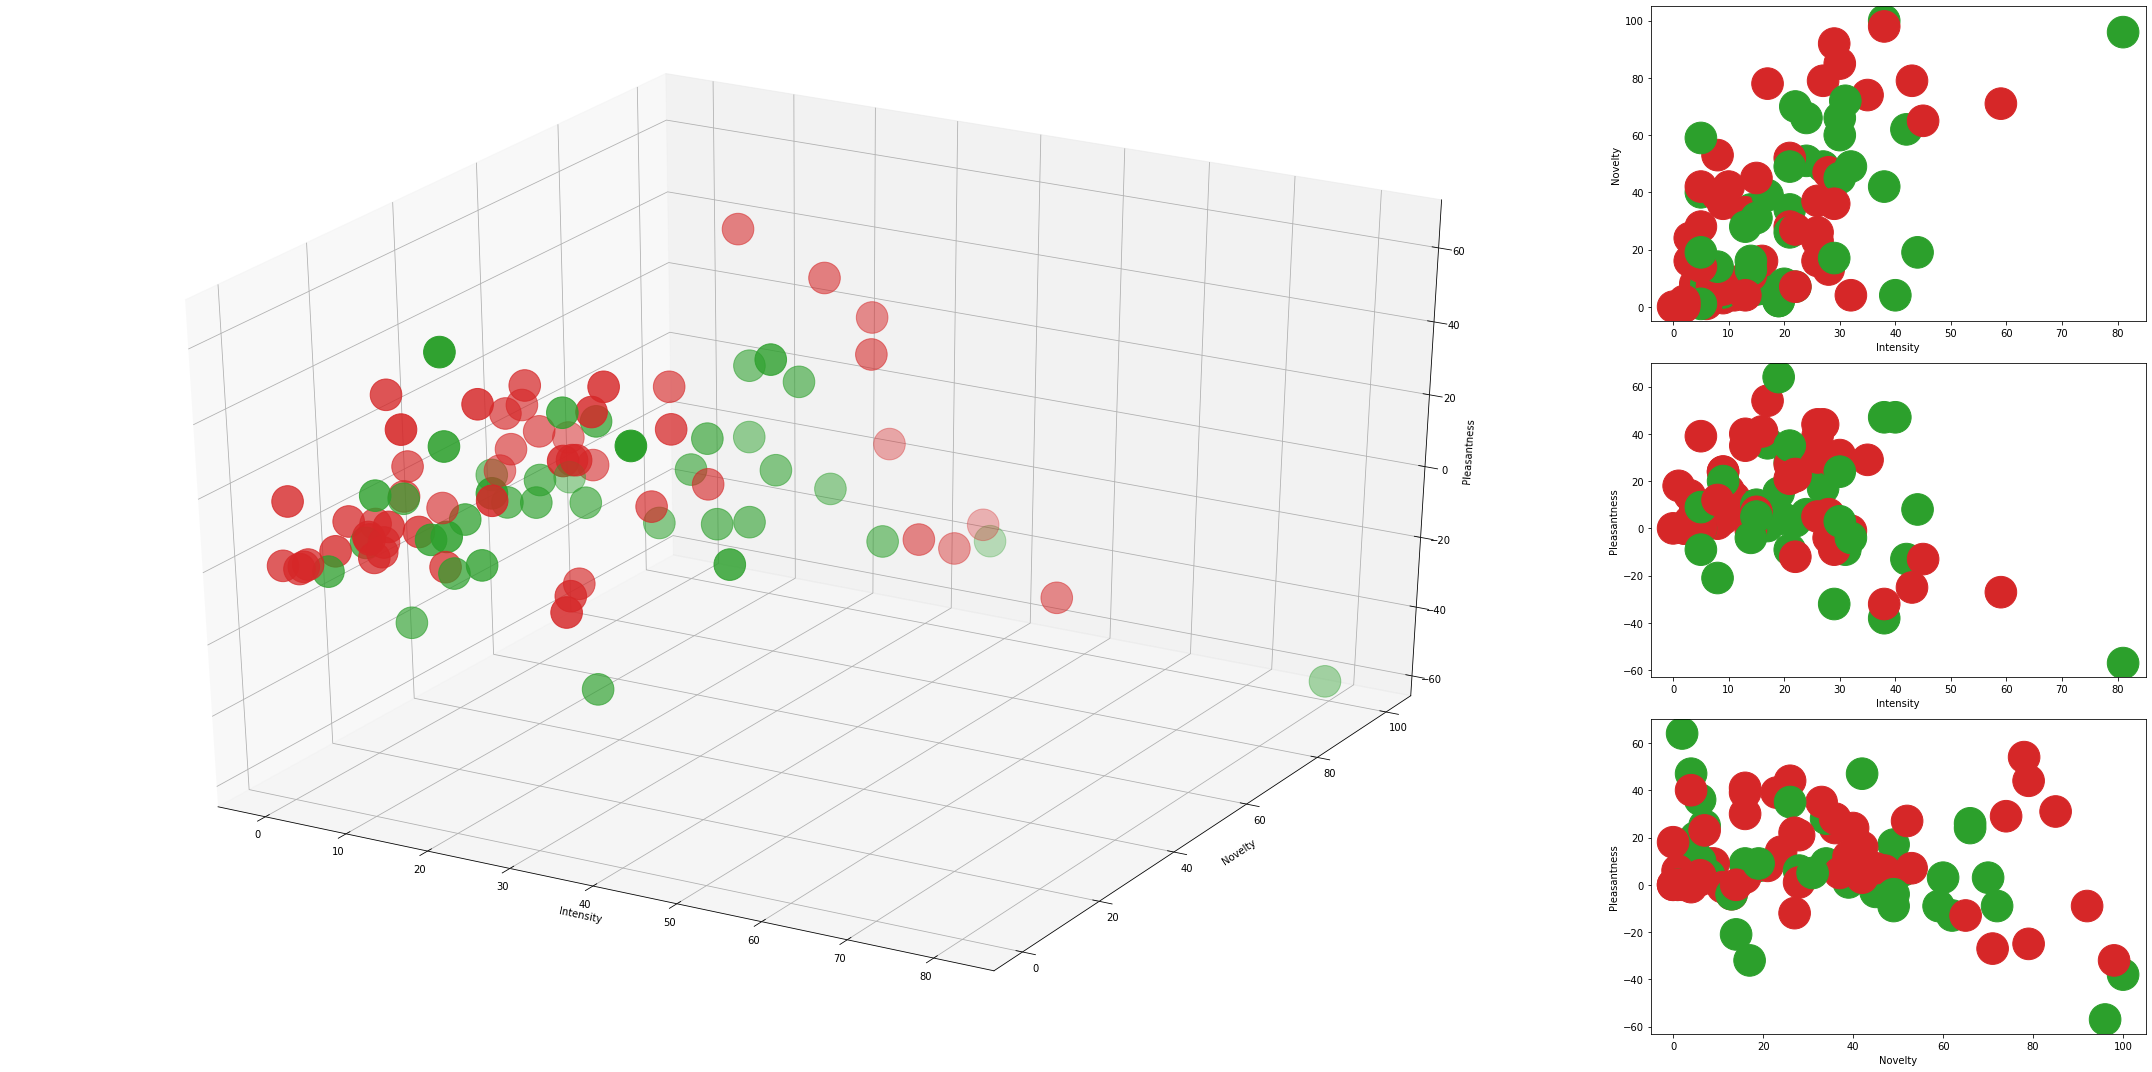

In [ ]:
marker_code = {'Apple Cider': '*',
              'Black Currant': 'o',
              'Cashew': 'P',
              'Lychee': 'D',
              'Pomegranate': 'p',
              'Tamarind': 'X'}

x = flavorRatingScores_df['Intensity'].tolist()
y = flavorRatingScores_df['Novelty'].tolist()
z = flavorRatingScores_df['Pleasantness'].tolist()

#colors = ['tab:red' if p < 4 else 'tab:orange' if p == 4 else 'gold' if p == 5 else 'tab:green' for p in flavorRatingScores_df['Test 1'].tolist()]
colors = ['tab:red' if p < 4 else 'tab:green' if p == 4 else 'tab:green' if p == 5 else 'tab:green' for p in flavorRatingScores_df['Test 1'].tolist()]
markers = [marker_code[p] for p in flavorRatingScores_df['Flavor'].tolist()]
Scores = flavorRatingScores_df['Test 1'].tolist()
sizes = [50 + (p) * 300 for p in Scores]


fig = plt.figure(figsize = [30,15])
ax = fig.add_subplot(1,4,(1,3), projection='3d')
ax.scatter(x, y, z, c=colors, s = 1000)#,marker = markers)
ax.set_xlabel('Intensity')
ax.set_ylabel('Novelty')
ax.set_zlabel('Pleasantness')

ax = fig.add_subplot(3,4,4)
ax.scatter(x, y, c=colors, s = 1000)#,marker = markers)
ax.set_xlabel('Intensity')
ax.set_ylabel('Novelty')


ax = fig.add_subplot(3,4,8)
ax.scatter(x, z, c=colors, s = 1000)#,marker = markers)
ax.set_xlabel('Intensity')
ax.set_ylabel('Pleasantness')

ax = fig.add_subplot(3,4,12)
ax.scatter(y, z, c=colors, s = 1000)#,marker = markers)
ax.set_xlabel('Novelty')
ax.set_ylabel('Pleasantness')

plt.tight_layout()